# Task 1 :- TITANIC SURVIVAL PREDICTION
**Objective: Aim is to predict the survival of passengers on the Titanic based on features such as age, gender, ticket class, fare, cabin, etc.** 

In [84]:
#importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
dt = pd.read_csv("Titanic-Dataset.csv")

# Inspect the data
dt.info()
dt.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### HANDLING DATA TYPES
**converting the columns "Survived", "Sex", "Embarked" to categorical for efficient usage. Because they are defined as object.**

In [89]:
dt['Survived'] = dt['Survived'].astype('category')
dt['Sex'] = dt['Sex'].astype('category')
dt['Embarked'] = dt['Embarked'].astype('category')
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 65.8+ KB


### HANDLING MISSING VALUES

In [92]:
# Identifying missing values

missing_values = dt.isnull().sum()
print("Missing values in each column:\n", missing_values)



Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [94]:
#filling missing values with median in AGE

dt['Age'] = dt['Age'].fillna(dt['Age'].median())

# Check if there are any missing values left in the 'Age' column
missing_values_count = dt['Age'].isnull().sum()
print(missing_values_count)


0


In [95]:


# Assuming dt is your DataFrame
dt['Embarked'] = dt['Embarked'].fillna(dt['Embarked'].mode()[0])

# Check if there are any missing values left in the 'Embarked' column
missing_values_count = dt['Embarked'].isnull().sum()
print(missing_values_count)


0


**we have completely filled the missing values in AGE and EMBARKED**

In [99]:
#drop Cabin from the dataset

dt.drop(columns=['Cabin'], inplace=True)

**dropped the Cabin column from the dataset**

In [102]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 58.8+ KB


### EXPLORATORY DATA ANALYSIS
**Summary Statistics**

In [104]:
# Summary statistics for numerical columns

print("Summary statistics for numerical columns:\n", dt.describe())

Summary statistics for numerical columns:
        PassengerId      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.361582    0.523008    0.381594   32.204208
std     257.353842    0.836071   13.019697    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   22.000000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    3.000000   35.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [106]:
# Frequency counts for categorical columns

print("Frequency counts for categorical columns:\n", dt['Sex'].value_counts())
print()
print(dt['Embarked'].value_counts())
print()
print(dt['Survived'].value_counts())

Frequency counts for categorical columns:
 Sex
male      577
female    314
Name: count, dtype: int64

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Survived
0    549
1    342
Name: count, dtype: int64


### Univariate Analysis

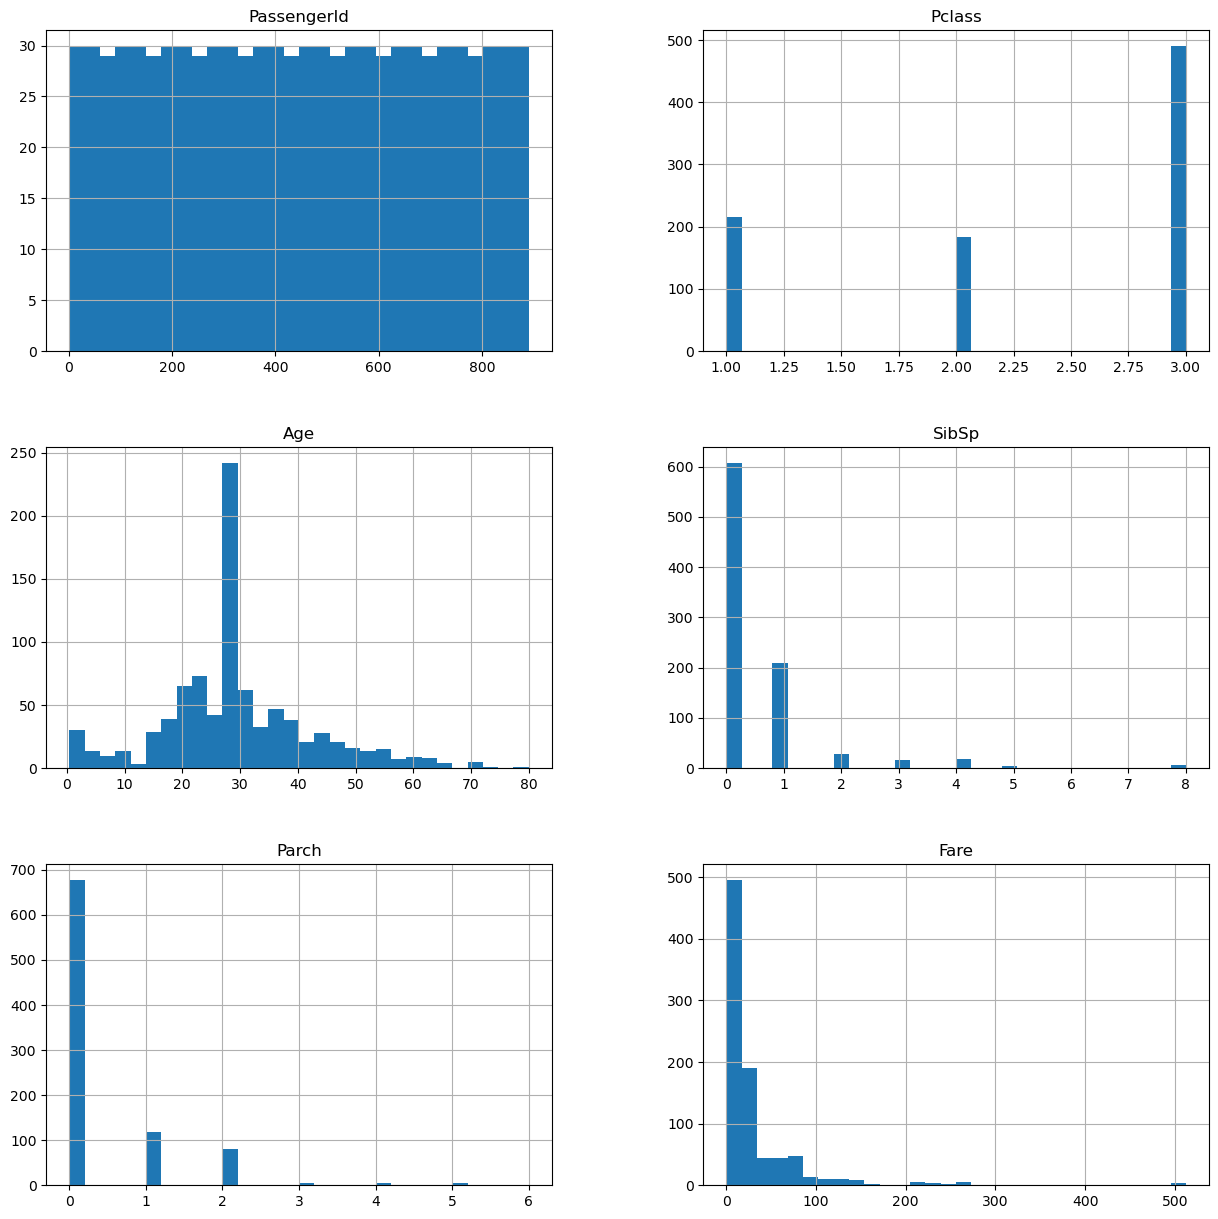

In [109]:
# Histograms for numerical features

dt.hist(bins=30, figsize=(15, 15))
plt.show()

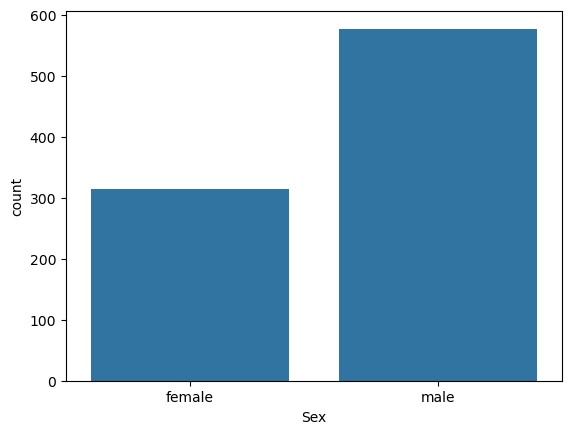

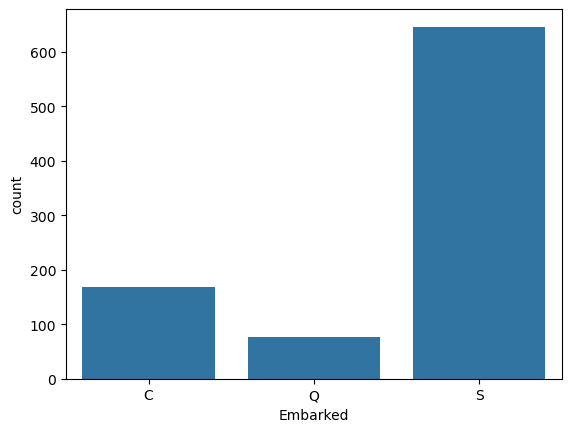

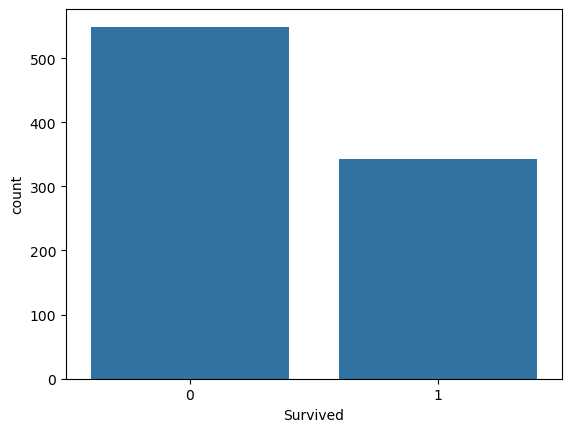

In [111]:
# Bar plots for categorical features

sns.countplot(data=dt, x='Sex')
plt.show()
sns.countplot(data=dt, x='Embarked')
plt.show()
sns.countplot(data=dt, x='Survived')
plt.show()

### Bivariate Analysis

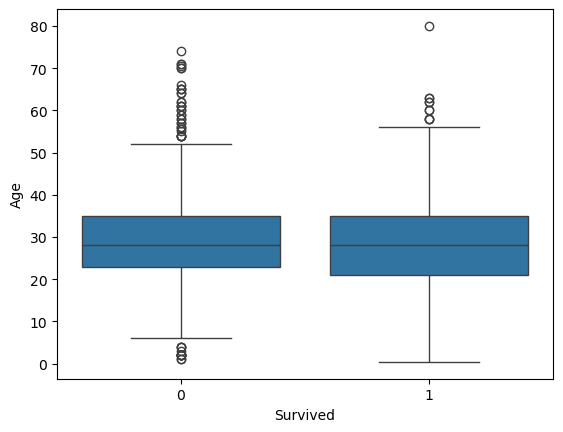

In [113]:
# Box plot for Age vs. Survived

sns.boxplot(data=dt, x='Survived', y='Age')
plt.show()

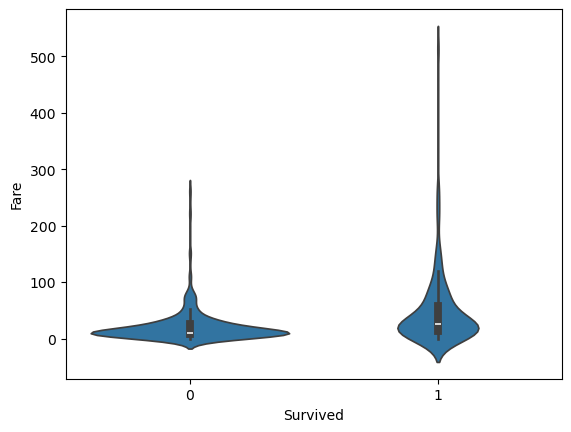

In [114]:
# Violin plot for Fare vs. Survived

sns.violinplot(data=dt, x='Survived', y='Fare')
plt.show()

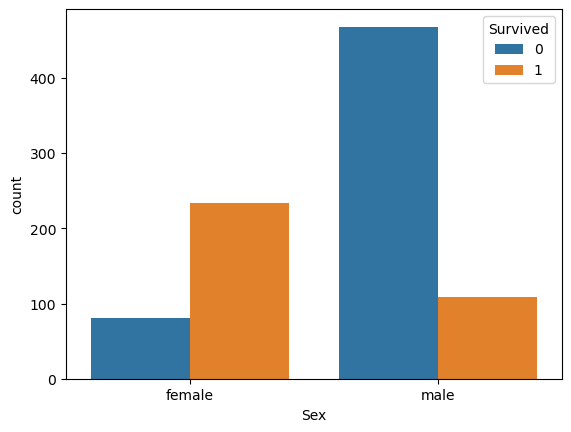

In [115]:
# Count plot for Sex vs. Survived

sns.countplot(data=dt, x='Sex', hue='Survived')
plt.show()

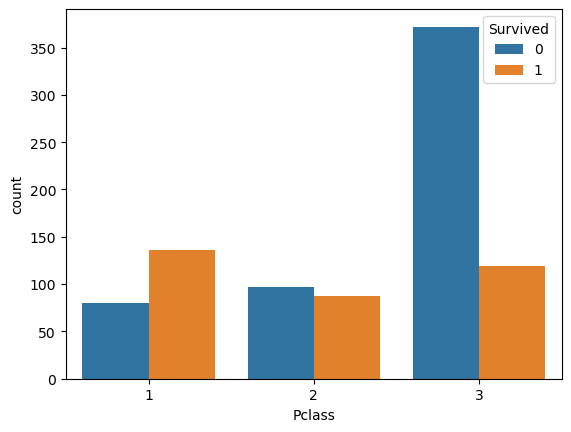

In [116]:
# Count plot for Pclass vs. Survived

sns.countplot(data=dt, x='Pclass', hue='Survived')
plt.show()

### Correlation Analysis

In [118]:
# Select only numerical columns

numerical_columns = dt.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix

correlation_matrix = dt[numerical_columns].corr()
print("Correlation matrix:\n", correlation_matrix)


Correlation matrix:
              PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.035144  0.034212 -0.057527 -0.001652  0.012658
Pclass         -0.035144  1.000000 -0.339898  0.083081  0.018443 -0.549500
Age             0.034212 -0.339898  1.000000 -0.233296 -0.172482  0.096688
SibSp          -0.057527  0.083081 -0.233296  1.000000  0.414838  0.159651
Parch          -0.001652  0.018443 -0.172482  0.414838  1.000000  0.216225
Fare            0.012658 -0.549500  0.096688  0.159651  0.216225  1.000000


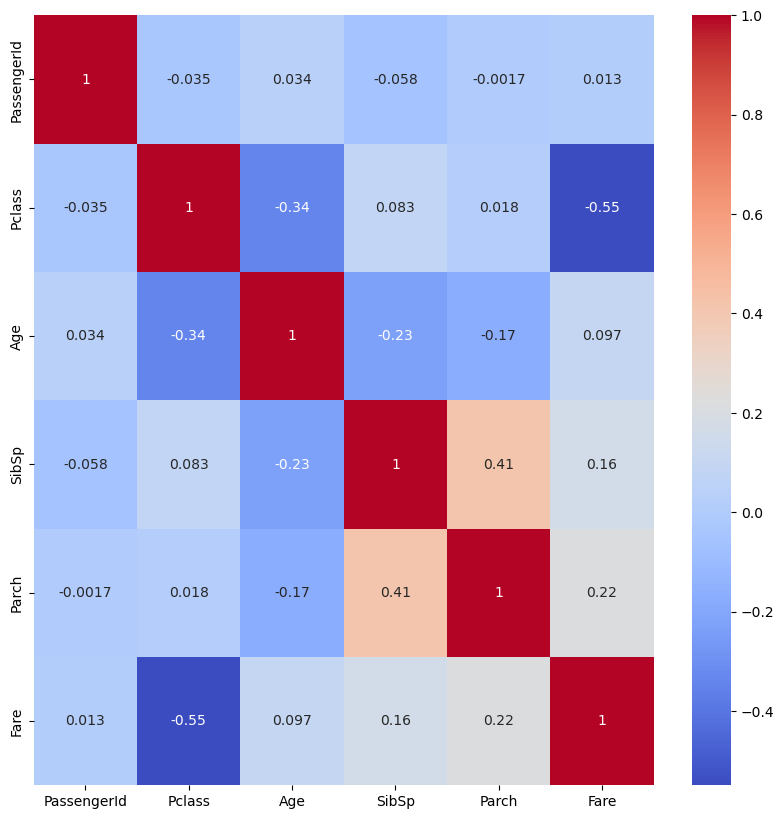

In [119]:
# Heatmap of correlation matrix

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## FEATURE ENGINEERING

In [121]:
# Create family size feature

dt['FamilySize'] = dt['SibSp'] + dt['Parch'] + 1

In [122]:
# Create is_alone feature

dt['IsAlone'] = (dt['FamilySize'] == 1).astype(int)
# One-hot encoding for categorical variables

dt = pd.get_dummies(dt, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
# Drop unnecessary columns

dt.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
# Verifying the new features

dt.head()


,Survived,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,2,0,True,False,True,False,True
1,1,38.0,1,0,71.2833,2,0,False,False,False,False,False
2,1,26.0,0,0,7.9250,1,1,False,False,True,False,True
3,1,35.0,1,0,53.1000,2,0,False,False,True,False,False
4,0,35.0,0,0,8.0500,1,1,True,False,True,False,True


In [124]:
# Separate features and target variable

X = dt.drop(columns=['Survived'])

y = dt['Survived'].astype(int)  # Ensure target is numerical


In [125]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (712, 11)
Testing set shape: (179, 11)


### MODEL SELECTION & TRAINING

- **We will evaluate several classifiers to determine which one performs best on our datasetsuch as Logistic Regression, Random Forest, and Support Vector Machine (SVM).**

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models

log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(random_state=42)

In [131]:
# Train and evaluate Logistic Regression

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7932960893854749
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
 [[90 15]
 [22 52]]


In [132]:
# Train and evaluate Random Forest

random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8268156424581006
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
 [[91 14]
 [17 57]]


In [134]:
# Train and evaluate SVM

svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

SVM Accuracy: 0.659217877094972
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179

Confusion Matrix:
 [[99  6]
 [55 19]]


## PREDICTION
**using the model with highest accuracy. In our case we use random forest classifier**

In [137]:
dt.head()

,Survived,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,2,0,True,False,True,False,True
1,1,38.0,1,0,71.2833,2,0,False,False,False,False,False
2,1,26.0,0,0,7.9250,1,1,False,False,True,False,True
3,1,35.0,1,0,53.1000,2,0,False,False,True,False,False
4,0,35.0,0,0,8.0500,1,1,True,False,True,False,True


In [139]:
# Example input
input_data = {
    'Age': 30,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 50,
    'FamilySize': 2,
    'IsAlone': 0,
    'Sex_male': 1,   # 1 for male, 0 for female
    'Embarked_Q': 0, # 1 if embarked from Queenstown, 0 otherwise
    'Embarked_S': 1, # 1 if embarked from Southampton, 0 otherwise
    'Pclass_2': 0,   # 1 if in 2nd class, 0 otherwise
    'Pclass_3': 1    # 1 if in 3rd class, 0 otherwise
}

# Convert input data into a DataFrame
input_df = pd.DataFrame([input_data])

# Make prediction
prediction = random_forest.predict(input_df)

# Display prediction
if prediction[0] == 1:
    print("The passenger survived.")
else:
    print("The passenger did not survived.")


The passenger did not survived.
